# Single Photon Counting Test

## Imports

In [1]:
import h5py
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import pycentroids as centroids

In [3]:
help(centroids.find_photons)

Help on built-in function find_photons in module pycentroids:

find_photons(...) method of builtins.PyCapsule instance
    find_photons(images: numpy.ndarray[uint16], threshold: int, box: int=2) -> tuple
    
    Find photons



## Load test data

In [4]:
!test -f image040.h5 || curl -o image040.h5 https://centroids-data.s3.amazonaws.com/image040.h5
!test -f image040-xray.txt || curl -o image040-xray.txt https://centroids-data.s3.amazonaws.com/image040-xray.txt

In [5]:
image = h5py.File('image040.h5', 'r')
xip = pd.read_csv('image040-xray.txt', delim_whitespace=True)

In [6]:
data = np.asarray(image['data'])

## Call the fast code for single photon counting

In [7]:
table, out, bias = centroids.find_photons(data, 400, 2)

In [8]:
df = pd.DataFrame(table)

## Plot the results 
### Whole image

<IPython.core.display.Javascript object>


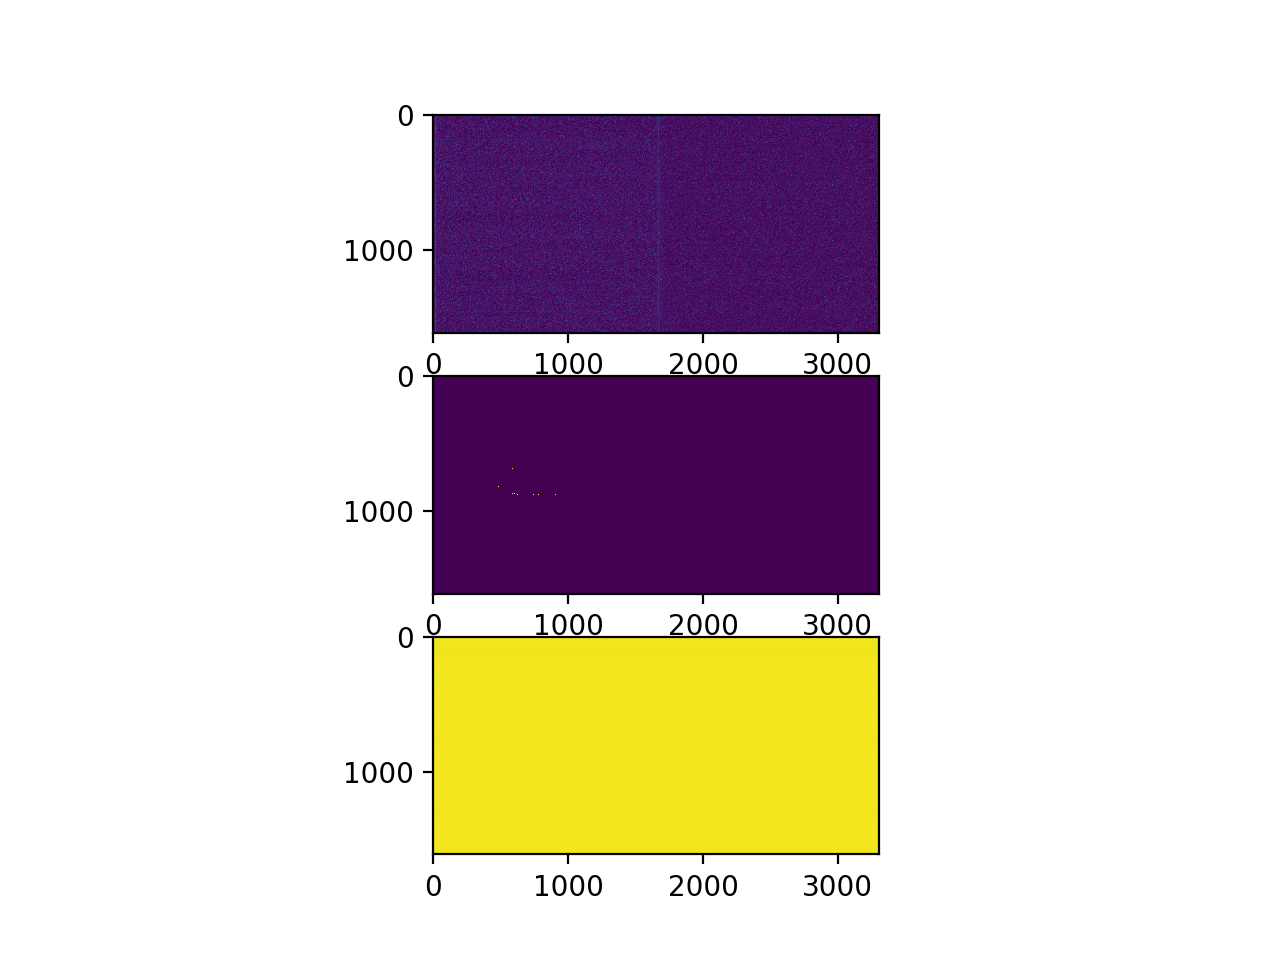

In [9]:
fig, ax = plt.subplots(3,1)
ax[0].imshow(data, vmin=150, vmax=300)
ax[1].imshow(out>0)
ax[2].imshow(bias)

## Selected part of the image

<IPython.core.display.Javascript object>


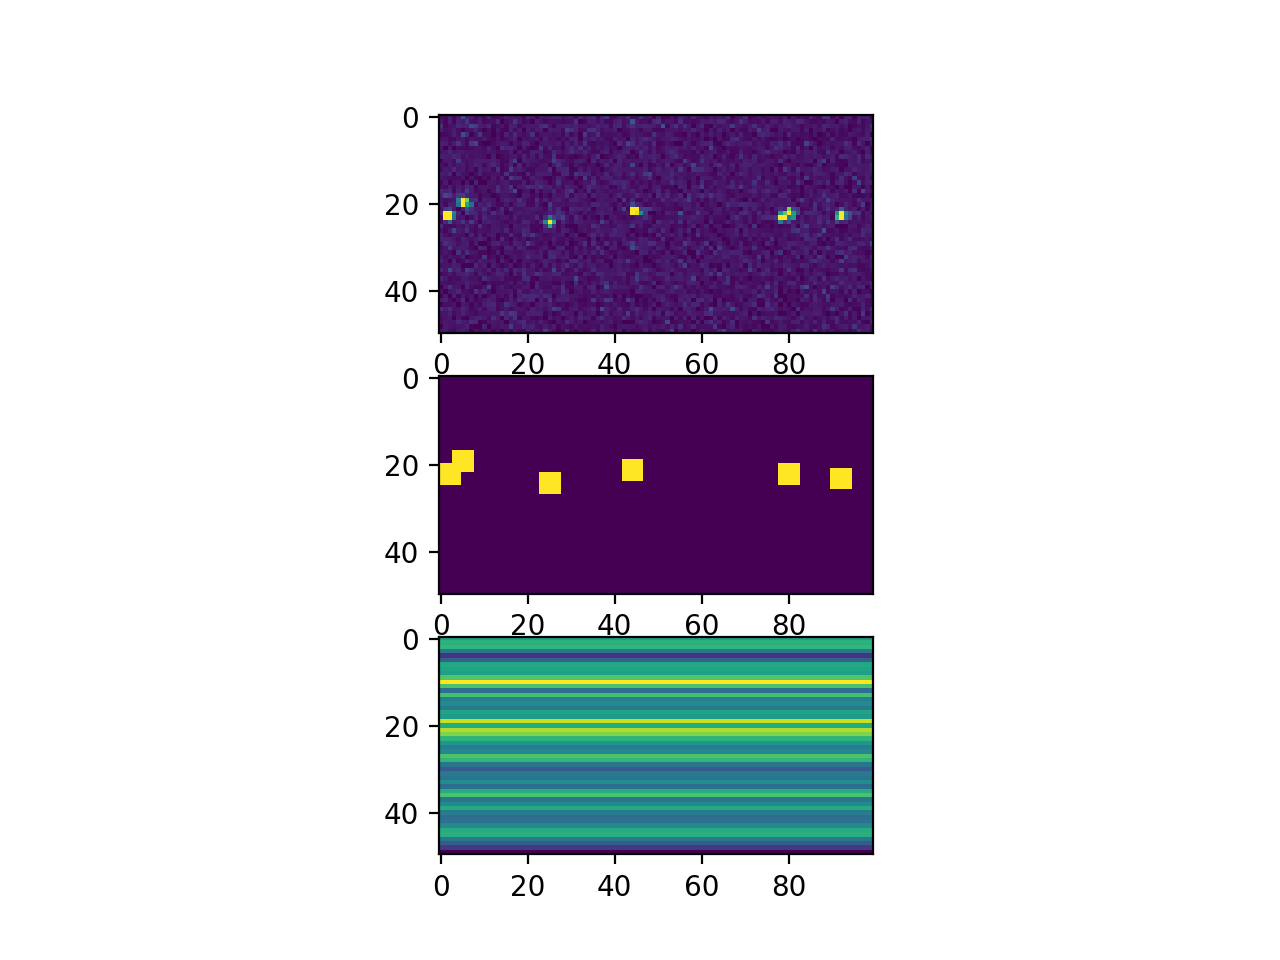

In [10]:
fig, ax = plt.subplots(3,1)
ax[0].imshow(data[850:900,600:700], vmin=150, vmax=300)
ax[1].imshow(out[850:900,600:700]>0)
ax[2].imshow(bias[850:900,600:700] )

In [11]:
df.sort_values(by=[0, 1])

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
22,416.0,873.0,416.331784,872.978625,1061.254820,0.954239,0.0,1039.188153,476.020906,157.020906,...,1.020906,1.020906,0.020906,0.020906,-1.979094,-2.979094,-4.979094,-5.979094,-7.979094,-8.979094
28,428.0,874.0,428.306026,873.816384,1032.003473,2.222608,0.0,1019.003473,524.222608,126.222608,...,3.222608,2.222608,1.222608,1.222608,0.222608,-0.777392,-0.777392,-1.777392,-1.777392,-5.777392
23,461.0,873.0,461.000945,872.845936,1063.521487,-0.312427,0.0,1052.188153,809.020906,63.020906,...,0.020906,-0.979094,-0.979094,-0.979094,-1.979094,-1.979094,-4.979094,-4.979094,-5.979094,-6.979094
1,487.0,818.0,486.706571,817.637264,1089.806980,2.645220,0.0,1081.606980,286.845220,217.845220,...,4.845220,4.845220,2.845220,0.845220,0.845220,0.845220,-3.154780,-3.154780,-5.154780,-5.154780
6,496.0,872.0,495.962963,872.459695,886.598414,3.177602,0.0,875.998414,268.777602,234.777602,...,4.777602,3.777602,1.777602,1.777602,1.777602,0.777602,0.777602,-0.222398,-0.222398,-4.222398
7,503.0,872.0,503.092832,872.423032,844.131747,1.644268,8.0,830.998414,290.777602,216.777602,...,2.777602,1.777602,1.777602,0.777602,-0.222398,-0.222398,-0.222398,-2.222398,-2.222398,-9.222398
24,506.0,873.0,506.114075,872.846366,971.988153,7.220906,8.0,958.188153,402.020906,141.020906,...,6.020906,6.020906,5.020906,4.020906,3.020906,2.020906,2.020906,2.020906,-1.979094,-4.979094
4,513.0,871.0,512.867876,871.226252,1126.737555,3.007876,0.0,1113.070888,434.674543,265.674543,...,4.674543,3.674543,3.674543,2.674543,1.674543,-2.325457,-2.325457,-3.325457,-3.325457,-4.325457
25,525.0,873.0,525.432302,873.160542,1002.188153,2.020906,0.0,992.188153,394.020906,277.020906,...,6.020906,5.020906,2.020906,2.020906,1.020906,-0.979094,-3.979094,-4.979094,-4.979094,-8.979094
8,542.0,872.0,542.284990,872.146045,970.598414,2.177602,0.0,948.998414,503.777602,108.777602,...,2.777602,1.777602,1.777602,0.777602,-0.222398,-1.222398,-1.222398,-3.222398,-4.222398,-4.222398


<IPython.core.display.Javascript object>


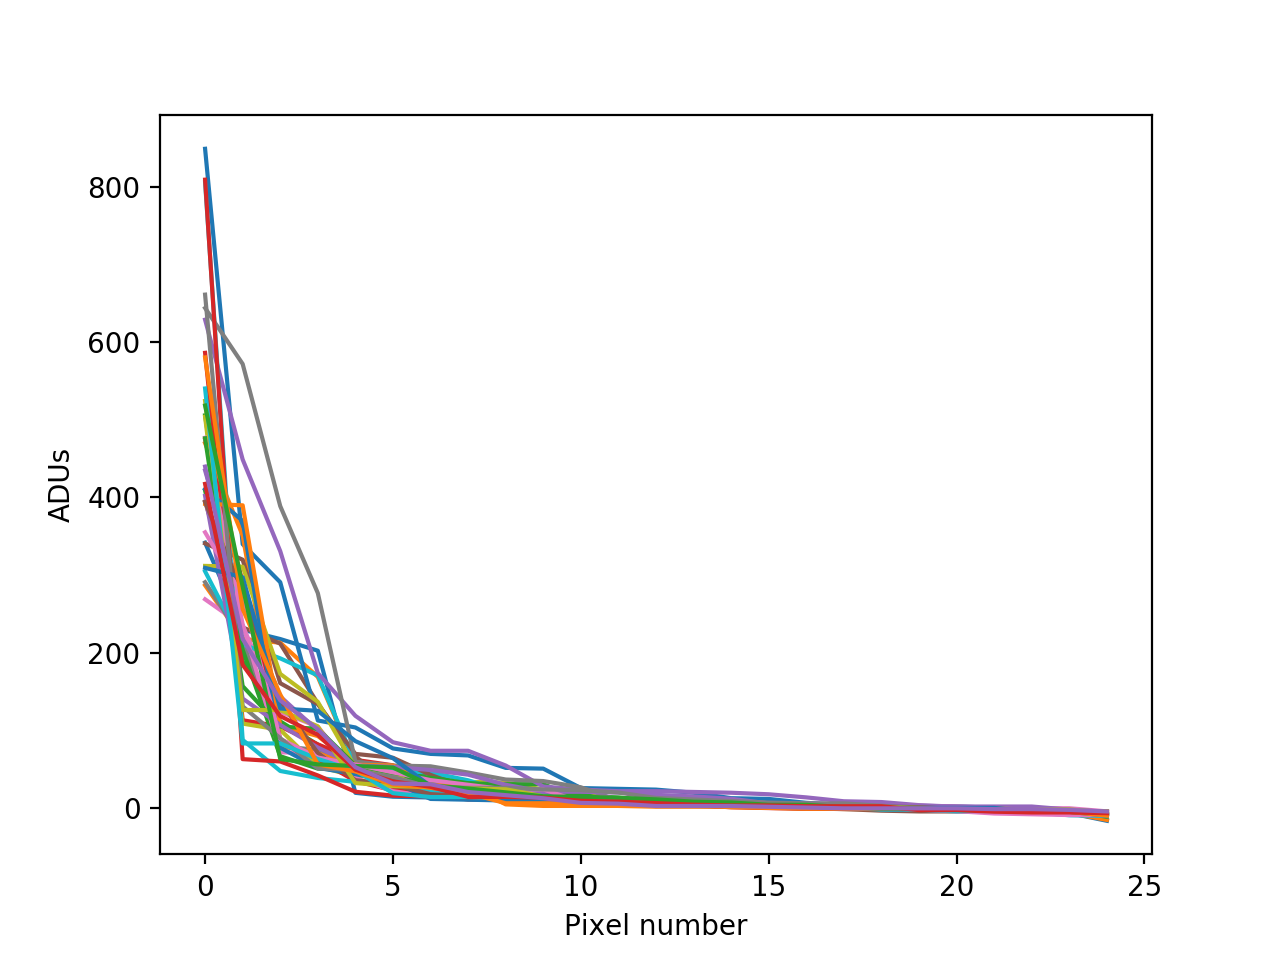

Text(0.5, 0, 'Pixel number')

In [12]:
fig, ax = plt.subplots(1,1)
for row in table:
    ax.plot(row[8:])
ax.set_ylabel('ADUs')
ax.set_xlabel('Pixel number')

<IPython.core.display.Javascript object>


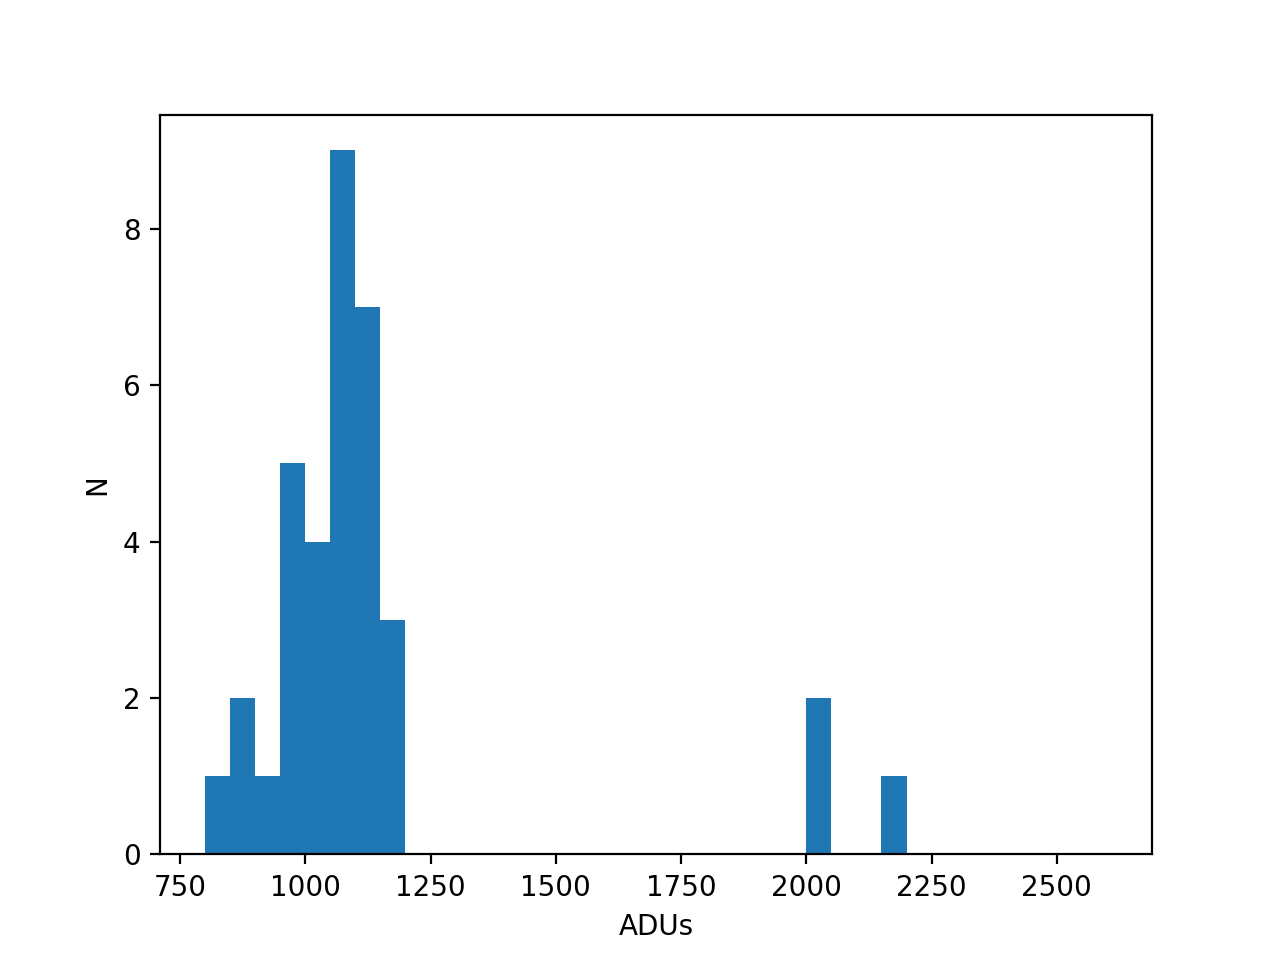

Text(0.5, 0, 'ADUs')

In [13]:
fig, ax = plt.subplots(1,1)
ax.hist(table[:,4], bins=36, range=(800, 2600))
ax.set_ylabel('N')
ax.set_xlabel('ADUs')

<IPython.core.display.Javascript object>


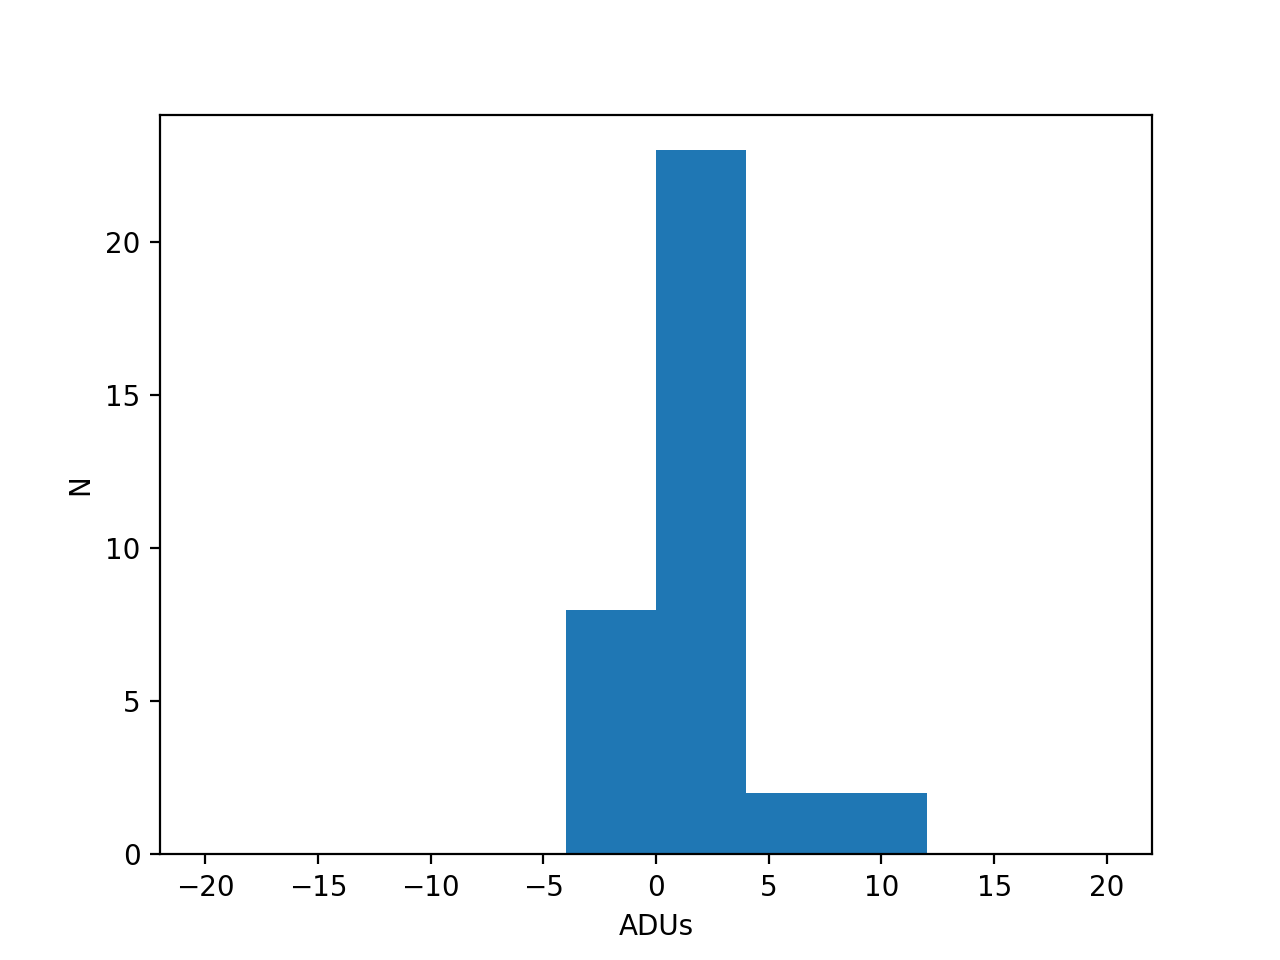

Text(0.5, 0, 'ADUs')

In [14]:
fig, ax = plt.subplots(1,1)
ax.hist(table[:,5], bins=10, range=(-20, 20))
ax.set_ylabel('N')
ax.set_xlabel('ADUs')

In [15]:
centroids.__version__

'v0.1-40-g91492fc+'

In [16]:
xip.sort_values(by=['x', 'y'])

,No,x,y,x-fit,y-fit,y-fcorr,sum-reg,XIP
7,8,415.706112,872.455404,416.197709,872.988630,872.988630,984.921742,0
3,4,427.701854,873.276698,428.188179,873.800814,873.800814,972.820754,0
26,27,486.125134,817.102183,486.535362,817.583624,817.583624,961.125862,0
27,28,495.479529,871.918364,495.971649,872.444111,872.444111,844.501365,0
25,26,502.408496,871.865533,502.888439,872.408424,872.408424,764.114218,0
15,16,505.642505,872.403283,506.149964,872.917741,872.917741,867.723584,0
11,12,512.258464,870.697340,512.670012,871.198095,871.198095,1076.202202,0
17,18,524.849415,872.682125,525.383103,873.190723,873.190723,939.331845,0
5,6,541.617180,871.580460,542.119667,872.126709,872.126709,898.699084,0
28,29,548.379037,871.831551,548.849151,872.415480,872.415480,601.140995,0
